Part 1 - Blob Detection

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [14]:
image_path = "images/example-image.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
sift = cv2.SIFT_create()

In [15]:
keypoints = sift.detect(image, None)

In [16]:
output_image = cv2.drawKeypoints(
    image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

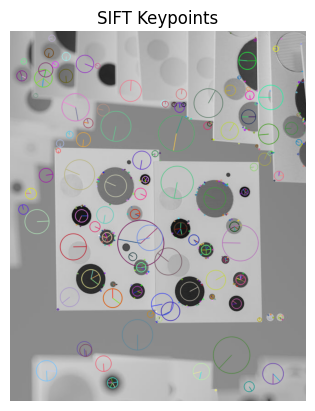

In [17]:
plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.title("SIFT Keypoints")
plt.show()

In [18]:
print("First 5 Keypoints:")
for i, kp in enumerate(keypoints[:5]):
    print(f"Keypoint {i + 1}:")
    print(f"  pt (coordinates): {kp.pt}")
    print(f"  size: {kp.size}")
    print(f"  angle: {kp.angle}")
    print(f"  response (strength): {kp.response}")
    print(f"  octave (pyramid layer): {kp.octave}")
    print(f"  class_id: {kp.class_id}")

First 5 Keypoints:
Keypoint 1:
  pt (coordinates): (25.056865692138672, 96.4741439819336)
  size: 22.15937614440918
  angle: 29.3697509765625
  response (strength): 0.01890508085489273
  octave (pyramid layer): 14615042
  class_id: -1
Keypoint 2:
  pt (coordinates): (25.056865692138672, 96.4741439819336)
  size: 22.15937614440918
  angle: 96.75640869140625
  response (strength): 0.01890508085489273
  octave (pyramid layer): 14615042
  class_id: -1
Keypoint 3:
  pt (coordinates): (25.056865692138672, 96.4741439819336)
  size: 22.15937614440918
  angle: 247.10455322265625
  response (strength): 0.01890508085489273
  octave (pyramid layer): 14615042
  class_id: -1
Keypoint 4:
  pt (coordinates): (28.548383712768555, 385.4710998535156)
  size: 20.997682571411133
  angle: 256.58172607421875
  response (strength): 0.013468057848513126
  octave (pyramid layer): 10748418
  class_id: -1
Keypoint 5:
  pt (coordinates): (29.529165267944336, 65.21955108642578)
  size: 12.45711898803711
  angle: 17

Part 2 - Tuning blob detection performance

In [19]:
sift_tuned = cv2.SIFT_create(contrastThreshold=0.02, edgeThreshold=5)
keypoints_tuned = sift_tuned.detect(image, None)

In [20]:
output_tuned = cv2.drawKeypoints(
    image, keypoints_tuned, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

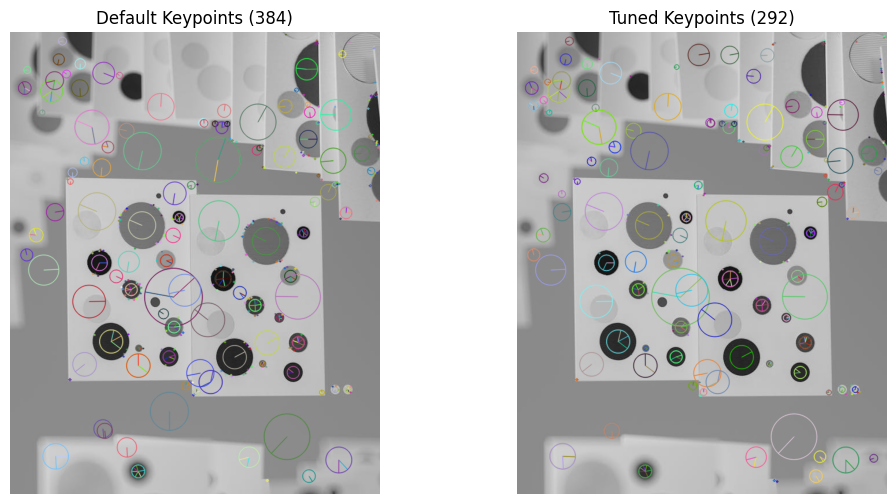

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(output_image, cmap='gray')
plt.title(f"Default Keypoints ({len(keypoints)})")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(output_tuned, cmap='gray')
plt.title(f"Tuned Keypoints ({len(keypoints_tuned)})")
plt.axis('off')

plt.show()

In [24]:
print(f"Default contrastThreshold=0.04, edgeThreshold=10 -> Keypoints detected: {len(keypoints)}")
print(f"Tuned contrastThreshold=0.02, edgeThreshold=5   -> Keypoints detected: {len(keypoints_tuned)}")

Default contrastThreshold=0.04, edgeThreshold=10 -> Keypoints detected: 384
Tuned contrastThreshold=0.02, edgeThreshold=5   -> Keypoints detected: 292


Part 3 - Descriptors

In [25]:
keypoints, descriptors = sift.compute(image, keypoints)

In [26]:
print(f"Number of keypoints: {len(keypoints)}")
print(f"Descriptors shape: {descriptors.shape} (Rows: keypoints, Columns: 128 features)")

Number of keypoints: 384
Descriptors shape: (384, 128) (Rows: keypoints, Columns: 128 features)


In [29]:
output_final = cv2.drawKeypoints(
    image, keypoints_tuned, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)


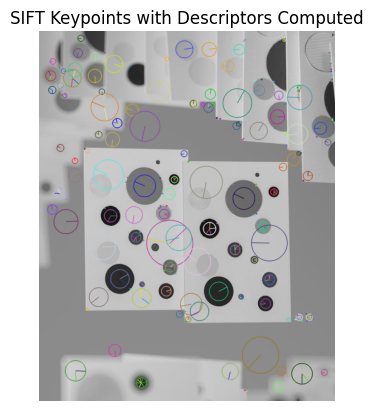

In [30]:
plt.imshow(output_final, cmap='gray')
plt.title("SIFT Keypoints with Descriptors Computed")
plt.axis('off')
plt.show()